RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

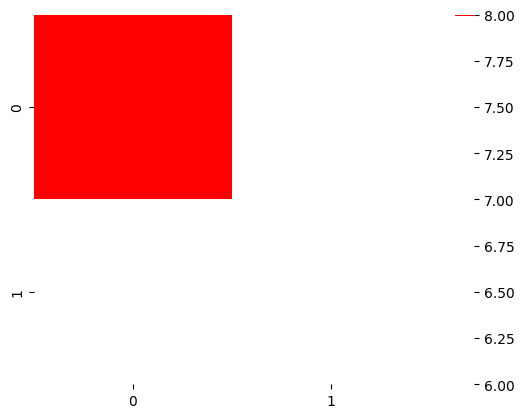

In [33]:
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import seaborn as sns 

from matplotlib import pyplot as plt
from TP4.src.radius import constant
from TP4.src.distance import euclidean
from TP4.src.kohonen import kohonen
from TP4.src.standarize import standardize

input_data = pd.read_csv('/Users/motegui/Documents/GitHub/SIA-TP-S/TP4/data/europe.csv')
input_data = input_data[
    ['Country', 'Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']].values

input_data = standardize(input_data)
network = kohonen(input_data, 2, 10000, euclidean, constant, 'input data', 0.1, 1)

t = network.test(input_data)
colors = [(256, 256, 256), (1, 0, 0)]  # Negro al rojo

# Crear el mapa de colores personalizado
cmap = LinearSegmentedColormap.from_list('custom', colors)
ax = sns.heatmap(t[0].astype(float), cmap=cmap, vmin=np.min(t[0].astype(float)), vmax=np.max(t[0].astype(float)))
plt.colorbar() 
plt.show()

print(t[0])
print(t[1])
    
